In [ ]:
import warnings
warnings.filterwarnings('ignore')

#문제상황

A사는 최근 공격적인 마케팅을 통하여 신규 회원 카드 발급률(%)을 끌어올리고 있는 상황

성공적인 마케팅으로 신규 회원 카드 발급률(%)을 원하는 목표를 달성하였지만, 연체가 심하게 발생하고 있는 상황

연체 가능성이 높은 고객을 예측하고 사전 관리를 통해 해당 이슈를 해결하는 방법을 찾고자 한다.

#데이터 살펴보기

In [ ]:
import json
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

#Data 불러오기
df = pd.read_csv('/content/credit.csv')
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
df.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
df['income_type'].value_counts()

,count
income_type,
Working,13645
Commercial associate,6202
Pensioner,4449
State servant,2154
Student,7


In [ ]:
#income_type의 글자 길이가 너무 길어서 비효율적, 보기 쉽도록 변경
dic_cd = {'Working': 'code1',
          'Commercial associate': 'code2',
          'Pensioner': 'code3',
          'State servant' : 'code4',
          'Student' : 'code5'}

In [ ]:
df['income_type'] = df['income_type'].apply(lambda x: dic_cd[x])

In [ ]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,code2,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,code2,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,code1,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,code2,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,code4,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


#문제해결 프로세스 정의

##문제정의

상황: 신용카드 신규 발급 증가에 따른 연체자 수 증가

문제: 카드 연체자 증가로 인한 자금 유동성 문제 발생

##기대효과

연체자 카드 대금 회수로 자금 유동성 증가

연체자 예측 모델 생성으로 연체자 관리 프로그램 및 마케팅 활용(추가 상품 유도(ex: 리볼팅 등))

##해결방안

신용카드 회원 정보를 활용한 연체자 예측 모델 개발

연체자 예측 모델을 통한 고객 관리 프로그램 운영

##성과측정

예측 모델 활용 전/후 정량적 지표 비교(자금 유동성 비율)

연체 가능성이 높은 고객 대상 추가 마케팅 진행으로 창출한 수익 확인

#Session 1

##Data 전처리

In [ ]:
#Data 형태 확인
df.shape

(26457, 20)

In [ ]:
#Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
#Null 확인
df.isnull().sum()

,0
index,0
gender,0
car,0
reality,0
child_num,0
income_total,0
income_type,0
edu_type,0
family_type,0
house_type,0


In [ ]:
#Null 비율 확인, sort
df_null = pd.DataFrame(df.isnull().sum(), columns = ['Null'])
df_null['Null_Ratio'] = df_null['Null'] / len(df)
df_null.sort_values(['Null_Ratio'], ascending = False)

,Null,Null_Ratio
occyp_type,8171,0.308841
index,0,0.000000
gender,0,0.000000
begin_month,0,0.000000
family_size,0,0.000000
email,0,0.000000
phone,0,0.000000
work_phone,0,0.000000
FLAG_MOBIL,0,0.000000
DAYS_EMPLOYED,0,0.000000


In [ ]:
#30% null col 사용 결정, 'ETC'로 처리
df['occyp_type'] = df['occyp_type'].fillna('etc')
df.isnull().sum()

,0
index,0
gender,0
car,0
reality,0
child_num,0
income_total,0
income_type,0
edu_type,0
family_type,0
house_type,0


In [ ]:
#null처리 확인
df['occyp_type'].value_counts()

,count
occyp_type,
etc,8171
Laborers,4512
Core staff,2646
Sales staff,2539
Managers,2167
Drivers,1575
High skill tech staff,1040
Accountants,902
Medicine staff,864


In [ ]:
#Zero 비율 확인
list_of_df = []

for i in df.columns:
  loof_df = pd.DataFrame({'val' : [i],
                          'zero_cnt': df[df[i] == 0].count()[0]})
  list_of_df.append(loof_df)

df_merge = pd.concat(list_of_df).reset_index(drop = True)
df_merge['zero_ratio'] = df_merge['zero_cnt'] / len(df)
df_merge.sort_values('zero_ratio', ascending = False)

,val,zero_cnt,zero_ratio
15,email,24042,0.908720
13,work_phone,20511,0.775258
14,phone,18672,0.705749
4,child_num,18340,0.693200
19,credit,3222,0.121783
18,begin_month,231,0.008731
0,index,1,0.000038
7,edu_type,0,0.000000
8,family_type,0,0.000000
9,house_type,0,0.000000


In [ ]:
#90% 초과하는 cold은 큰 의미는 없지만, 우선 모델링 후 제거하는 방향성으로 진행
df.shape

(26457, 20)

##DataEDA

In [ ]:
df.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,code2,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,etc,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,code2,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,code1,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


In [ ]:
#Target ratio(multi-classification 문제)
print(df['credit'].value_counts())
print('-------------------------------------')
print(df['credit'].value_counts(normalize = True))

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64
-------------------------------------
credit
2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: proportion, dtype: float64


In [ ]:
df.select_dtypes('object').columns

Index(['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type',
       'house_type', 'occyp_type'],
      dtype='object')

In [ ]:
numerical_list = list(df.select_dtypes(exclude = 'object').columns)
categorical_list = list(df.select_dtypes(include = 'object').columns)

In [ ]:
#numerical_list value unique값 확인
for i in numerical_list:
  print(i," : ",df[i].nunique())

index  :  26457
child_num  :  9
income_total  :  249
DAYS_BIRTH  :  6621
DAYS_EMPLOYED  :  3470
FLAG_MOBIL  :  1
work_phone  :  2
phone  :  2
email  :  2
family_size  :  10
begin_month  :  61
credit  :  3


In [ ]:
#categorical_list value unique값 확인
for i in categorical_list:
  print(i," : ",df[i].nunique())

gender  :  2
car  :  2
reality  :  2
income_type  :  5
edu_type  :  5
family_type  :  5
house_type  :  6
occyp_type  :  19


In [ ]:
#특정 col은 numerical에 해당된다고 보지 않음 그러므로 categorical로 옮기기
change_list = ['credit', 'work_phone', 'phone', 'email', 'FLAG_MOBIL']

for i in change_list:
  numerical_list.remove(i)

for i in change_list:
  categorical_list.append(i)

print(numerical_list)
print(categorical_list)

['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month']
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'credit', 'work_phone', 'phone', 'email', 'FLAG_MOBIL']


#Session 2

##Feature Engineering

In [ ]:
#Target ratio
#credit : 낮을수록 높은 신용의 신용카드 사용자 의미
print(df['credit'].value_counts())
print('---------------------------------')
print(df['credit'].value_counts(normalize = True))

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64
---------------------------------
credit
2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: proportion, dtype: float64


In [ ]:
#가장 신용도가 낮은 2를 찾는 문제로 간소화(Multi >> Binary)
df['credit'] = np.where(df['credit'] == 2, 1, 0)#신용도가 2면 1 아니면 0으로 변경
print(df['credit'].value_counts())
print('---------------------------------')
print(df['credit'].value_counts(normalize = True))

credit
1    16968
0     9489
Name: count, dtype: int64
---------------------------------
credit
1    0.641343
0    0.358657
Name: proportion, dtype: float64


In [ ]:
#sample col eda
eda_df = df.groupby('occyp_type')['credit'].agg(cnt = ('count'), t_cnt = ('sum')).reset_index()
eda_df['t_ratio'] = eda_df['t_cnt'] / eda_df['cnt']
eda_df.sort_values(by = ['t_ratio'], ascending = False)

,occyp_type,cnt,t_cnt,t_ratio
5,HR staff,62,51,0.822581
16,Security staff,424,297,0.700472
13,Realty agents,63,44,0.698413
11,Medicine staff,864,590,0.682870
1,Cleaning staff,403,270,0.669975
9,Low-skill Laborers,127,84,0.661417
10,Managers,2167,1429,0.659437
4,Drivers,1575,1030,0.653968
18,etc,8171,5266,0.644474
3,Core staff,2646,1677,0.633787


In [ ]:
#변수가 너무 많으므로 의미있는 변수를 추출
#iv 점수를 활용하여 높은 순서대로 필요한 변수를 추출

In [ ]:
!pip install optbinning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-datastore 2.19.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.1 which is incompati

In [ ]:
#numeric
from optbinning import OptimalBinning

iv_df = []

for i in numerical_list:
  variable = i
  x = df[variable].values
  y = df.credit

  optb = OptimalBinning(name = variable, dtype = 'numerical', solver = 'cp', max_n_prebins = 3)#bin이 너무 많으면 해석 어려움
  optb.fit(x, y)

  binning_table = optb.binning_table
  v1 = binning_table.build()

  loop_df = pd.DataFrame({'val' : variable,
                          'IV' : [v1.loc['Totals', 'IV']]})
  iv_df.append(loop_df)

iv_df = pd.concat(iv_df).reset_index(drop = True)
iv_df.sort_values(by = ['IV'], ascending = False)

(CVXPY) Nov 07 02:25:50 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Nov 07 02:25:50 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


,val,IV
6,begin_month,1.006220
3,DAYS_BIRTH,0.011866
4,DAYS_EMPLOYED,0.007658
2,income_total,0.002783
5,family_size,0.001626
1,child_num,0.000981
0,index,0.000894


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -8.50)",21737,0.821597,6557,15180,0.698348,-0.25825,0.052583,0.006555
1,"[-8.50, -3.50)",3003,0.113505,1230,1773,0.590410,0.215537,0.005417,0.000676
2,"[-3.50, inf)",1717,0.064898,1702,15,0.008736,5.312705,0.948220,0.059678
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,26457,1.000000,9489,16968,0.641343,,1.006220,0.066909


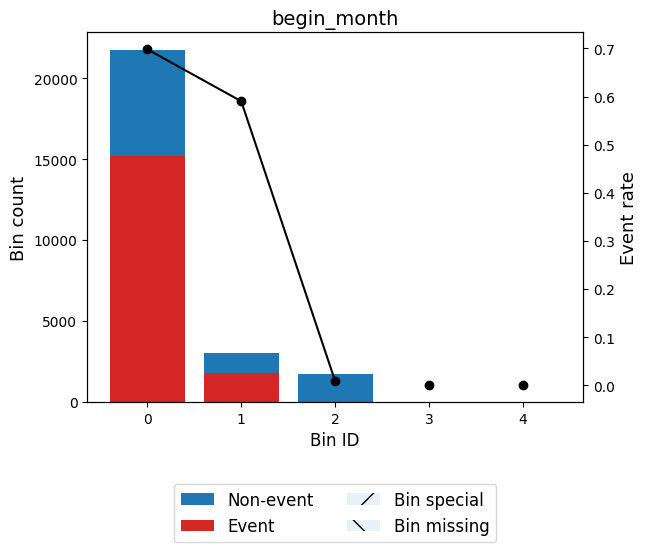

In [ ]:
#특정 변수를 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

variable = 'begin_month'
x = df[variable].values
y = df.credit

optb = OptimalBinning(name = variable, dtype = 'numerical', solver = 'cp', max_n_prebins = 3)#bin이 너무 많으면 해석 어려움
optb.fit(x, y)

binning_table = optb.binning_table
v1 = binning_table.build()

display(v1)
binning_table.plot(metric = 'event_rate')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -13481.50)",17769,0.671618,6112,11657,0.656030,-0.064457,0.002764,0.000345
1,"[-13481.50, -9971.50)",7138,0.269796,2692,4446,0.622864,0.079476,0.001723,0.000215
2,"[-9971.50, inf)",1550,0.058586,685,865,0.558065,0.347885,0.007379,0.000918
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,26457,1.000000,9489,16968,0.641343,,0.011866,0.001478


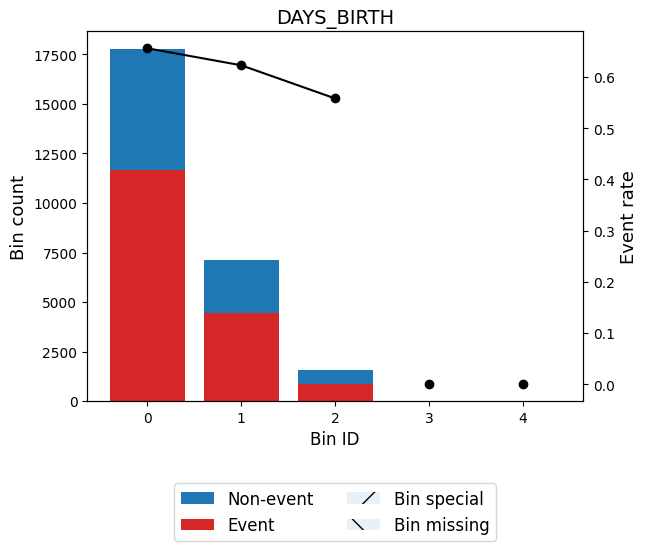

In [ ]:
#특정 변수를 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

variable = 'DAYS_BIRTH'
x = df[variable].values
y = df.credit

optb = OptimalBinning(name = variable, dtype = 'numerical', solver = 'cp', max_n_prebins = 3)#bin이 너무 많으면 해석 어려움
optb.fit(x, y)

binning_table = optb.binning_table
v1 = binning_table.build()

display(v1)
binning_table.plot(metric = 'event_rate')

In [ ]:
#categorical
from optbinning import OptimalBinning

iv_df = []

for i in categorical_list:
  variable = i
  x = df[variable].values
  y = df.credit

  optb = OptimalBinning(name = variable, dtype = 'categorical', solver = 'cp')
  optb.fit(x, y)

  binning_table = optb.binning_table
  v1 = binning_table.build()

  loop_df = pd.DataFrame({'val' : variable,
                          'IV' : [v1.loc['Totals', 'IV']]})
  iv_df.append(loop_df)

iv_df = pd.concat(iv_df).reset_index(drop = True)
iv_df.sort_values(by = ['IV'], ascending = False)

,val,IV
7,occyp_type,0.006224
5,family_type,0.004767
3,income_type,0.001783
6,house_type,0.001601
4,edu_type,0.001151
2,reality,0.001116
11,email,0.000967
1,car,0.000858
10,phone,0.000441
9,work_phone,0.000058


,gender,cnt,t_cnt,t_ratio
0,F,17697,11329,0.640165
1,M,8760,5639,0.643721


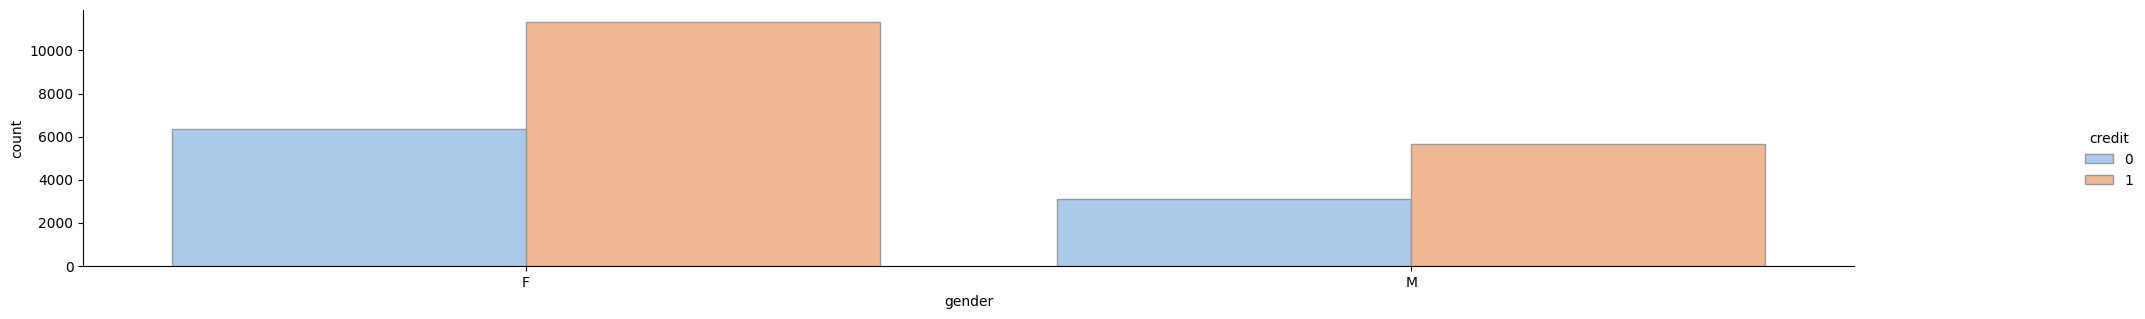

In [ ]:
#categorical
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

val = 'gender'

#target 기준(hue의 색상)으로 구분하여 Plot
sns.catplot(x = val, hue = 'credit', kind = 'count', palette = 'pastel', edgecolor = '.6', data = df)
plt.gcf().set_size_inches(25, 3)

#sample col eda
eda_df = df.groupby(val)['credit'].agg(cnt = ('count'), t_cnt = ('sum')).reset_index()
eda_df['t_ratio'] = eda_df['t_cnt'] / eda_df['cnt']
display(eda_df)

#Session 3

##Modeling Pricess

데이터 사전 준비

In [ ]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,code2,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,etc,2.0,-6.0,0
1,1,F,N,Y,1,247500.0,code2,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,0
2,2,M,Y,Y,0,450000.0,code1,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,1
3,3,F,N,Y,0,202500.0,code2,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0
4,4,F,Y,Y,0,157500.0,code4,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,1


In [ ]:
#데이터 분할
from sklearn.model_selection import train_test_split
X = df.drop(['index', 'credit', 'FLAG_MOBIL'], axis = 1)
y = df['credit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1234)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(18519, 17)
(18519,)
(7938, 17)
(7938,)


In [ ]:
numerical_list.remove('index')
categorical_list.remove('FLAG_MOBIL')


In [ ]:
categorical_list.remove('work_phone')
categorical_list.remove('phone')
categorical_list.remove('email')

In [ ]:
#credit은 변수가 아닌 target 이므로 삭제
categorical_list.remove('credit')

In [ ]:
X_train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month'],
      dtype='object')

In [ ]:
df[categorical_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       26457 non-null  object
 1   car          26457 non-null  object
 2   reality      26457 non-null  object
 3   income_type  26457 non-null  object
 4   edu_type     26457 non-null  object
 5   family_type  26457 non-null  object
 6   house_type   26457 non-null  object
 7   occyp_type   26457 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


###LogistRegression

In [ ]:
#ont hot encoding
from sklearn.preprocessing import OneHotEncoder

for col in categorical_list:
  encoder = OneHotEncoder()
  encoder.fit(X_train[[col]])
  onehot_train = pd.DataFrame(encoder.transform(X_train[[col]]).toarray(), columns = encoder.get_feature_names_out(), index = X_train.index)
  onehot_test = pd.DataFrame(encoder.transform(X_test[[col]]).toarray(), columns = encoder.get_feature_names_out(), index = X_test.index)

 #기존 col은 삭제
  X_train = pd.concat([X_train, onehot_train], axis = 1).drop(columns = [col])
  X_test = pd.concat([X_test, onehot_test], axis = 1).drop(columns = [col])

In [ ]:
X_train.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_code1,income_type_code2,income_type_code3,income_type_code4,income_type_code5,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,occyp_type_etc
10232,2,225000.0,-10937,-1539,0,0,0,4.0,-41.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14594,0,202500.0,-8353,-1081,1,0,1,2.0,-13.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1685,1,135000.0,-13108,-1299,0,0,0,3.0,-25.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12841,0,135000.0,-21374,365243,0,0,0,2.0,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7881,0,112500.0,-20775,365243,0,0,0,2.0,-12.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_code1,income_type_code2,income_type_code3,income_type_code4,income_type_code5,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,occyp_type_etc
23860,0,211500.0,-17249,-1661,1,1,0,2.0,-43.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26267,0,292500.0,-13434,-3515,0,0,1,1.0,-21.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13972,0,90000.0,-19042,-3319,0,0,0,1.0,-15.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16839,1,90000.0,-9087,-1051,0,0,0,3.0,-1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26452,2,225000.0,-12079,-1984,0,0,0,4.0,-2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#표준화(Standardization) 진행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
#기본적인 모델인 LogisticRegression으로 모델 학습
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_sc, y_train)

LogisticRegression()

In [ ]:
#에측 및 성능확인
from sklearn.metrics import classification_report

y_pred_train = LR.predict(X_train_sc)
y_pred_test = LR.predict(X_test_sc)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.71      0.12      0.20      6642
           1       0.66      0.97      0.79     11877

    accuracy                           0.67     18519
   macro avg       0.68      0.55      0.50     18519
weighted avg       0.68      0.67      0.58     18519

              precision    recall  f1-score   support

           0       0.69      0.12      0.21      2847
           1       0.66      0.97      0.79      5091

    accuracy                           0.67      7938
   macro avg       0.68      0.55      0.50      7938
weighted avg       0.67      0.67      0.58      7938



In [ ]:
#target에서 1이 너무 많아서 1에 대하여 과적합 발생이라고 판단 할 수 있음

In [ ]:
#roc_auc_score의 차이가 크면 과적합이라고 판단 할 수 있으나
#LR모델에서는 큰 차이가 없으므로 모델 전체적인 과적합은 아니라고 판단
from sklearn.metrics import roc_auc_score

y_pred_train_proba = LR.predict_proba(X_train_sc)[:, 1]
y_pred_test_proba = LR.predict_proba(X_test_sc)[:, 1]

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print('roc_score_train : ',roc_score_train)
print('roc_score_test : ',roc_score_test)

roc_score_train :  0.6198062028799308
roc_score_test :  0.6195804327519441


In [ ]:
#여러 모델의 성능 비교를 위한 빈 DataFrame 생성
df_comparison = pd.DataFrame(columns = ['model', 'f1_train', 'f1_test', 'AUC_train', 'AUC_test'])
df_comparison.columns = ['model', 'f1_train', 'f1_test', 'AUC_train', 'AUC_test']
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test


In [ ]:
#LR model 성능값 추가
from sklearn import metrics
lr_re = pd.DataFrame({'model' : ['LR'],
                      'f1_train' : metrics.f1_score(y_train, y_pred_train),
                      'f1_test' : metrics.f1_score(y_test, y_pred_test),
                      'AUC_train' : metrics.roc_auc_score(y_train, y_pred_train_proba),
                      'AUC_test' : metrics.roc_auc_score(y_test, y_pred_test_proba)})

df_comparison = pd.concat([df_comparison, lr_re], ignore_index = True)
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788862,0.788179,0.619806,0.61958


###Random Forest

In [ ]:
#데이터 분할
from sklearn.model_selection import train_test_split
X = df.drop(['index', 'credit', 'FLAG_MOBIL'], axis = 1)
y = df['credit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1234)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(18519, 17)
(18519,)
(7938, 17)
(7938,)


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
  encoder = LabelEncoder()
  encoder.fit(X_train[[col]])

  #기존 col 대체
  X_train[col] = encoder.transform(X_train[col])
  X_test[col] = encoder.transform(X_test[col])



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6642
           1       0.98      0.99      0.99     11877

    accuracy                           0.98     18519
   macro avg       0.98      0.98      0.98     18519
weighted avg       0.98      0.98      0.98     18519

              precision    recall  f1-score   support

           0       0.67      0.52      0.59      2847
           1       0.76      0.86      0.81      5091

    accuracy                           0.74      7938
   macro avg       0.71      0.69      0.70      7938
weighted avg       0.73      0.74      0.73      7938



In [ ]:
#LR모델보다는 결과가 좋지만 마찬가지로 test데이터셋에서 0에 대한 점수가 급격히 떨어짐
#1이 너무 많으므로 모델이 1에 대하여 과적합되었다고 판단

In [ ]:
#rfc모델에서는 큰 차이가 있으므로 모델이 전체적인 과적합이라고 판단
#따라서 hyperparameter의 최적화가 필요하다고 판단
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(X_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(X_test)[:, 1]

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print('roc_score_train : ',roc_score_train)
print('roc_score_test : ',roc_score_test)

roc_score_train :  0.9991481426466103
roc_score_test :  0.7557846215388534


In [ ]:
#BayesianOptimization 설치
!pip install Bayesian-optimization

In [ ]:
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score#과적합 방지를 위함

def model_evaluate(n_estimators, maxDepth):
  clf = RandomForestClassifier(
      n_estimators = int(n_estimators),
      max_depth = int(maxDepth)
  )
  scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'roc_auc')
  return np.mean(scores)

def bayesOpt(X_train, y_train):
  clfB0 = BayesianOptimization(model_evaluate, {'n_estimators': (100, 200),
                                                'maxDepth': (2, 4)})
  clfB0.maximize(init_points = 5, n_iter  = 10)
  print(clfB0.res)
bayesOpt(X_train, y_train)

|   iter    |  target   | maxDepth  | n_esti... |
-------------------------------------------------
| 1         | 0.623     | 2.865     | 152.0     |
| 2         | 0.6333    | 3.831     | 132.0     |
| 3         | 0.6244    | 2.082     | 113.3     |
| 4         | 0.6317    | 3.49      | 130.8     |
| 5         | 0.6236    | 2.463     | 146.1     |
| 6         | 0.6249    | 2.087     | 136.4     |
| 7         | 0.6259    | 2.014     | 132.4     |
| 8         | 0.632     | 3.938     | 133.2     |
| 9         | 0.6305    | 3.981     | 127.3     |
| 10        | 0.6302    | 3.786     | 123.5     |
| 11        | 0.6236    | 2.008     | 120.3     |
| 12        | 0.6258    | 2.071     | 125.4     |
| 13        | 0.6302    | 3.975     | 129.1     |
| 14        | 0.632     | 3.968     | 189.1     |
| 15        | 0.6315    | 3.458     | 191.6     |
[{'target': 0.6229808919612058, 'params': {'maxDepth': 2.864813950595951, 'n_estimators': 152.00529152760177}}, {'target': 0.6333432790650495, 'params

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 116, max_depth = 3, random_state=1121 )
rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))


#비교 Dataframe 에 추가
rfc_re = pd.DataFrame({'model' : ['RFC'],
                      'f1_train' : metrics.f1_score(y_train, y_pred_train),
                      'f1_test' : metrics.f1_score(y_test, y_pred_test),
                      'AUC_train' : metrics.roc_auc_score(y_train, y_pred_train_proba),
                      'AUC_test' : metrics.roc_auc_score(y_test, y_pred_test_proba)})

df_comparison = pd.concat([df_comparison, rfc_re], ignore_index = True)

              precision    recall  f1-score   support

           0       0.99      0.18      0.30      6642
           1       0.68      1.00      0.81     11877

    accuracy                           0.70     18519
   macro avg       0.84      0.59      0.56     18519
weighted avg       0.80      0.70      0.63     18519

              precision    recall  f1-score   support

           0       0.99      0.18      0.31      2847
           1       0.69      1.00      0.81      5091

    accuracy                           0.71      7938
   macro avg       0.84      0.59      0.56      7938
weighted avg       0.79      0.71      0.63      7938



In [ ]:
#LR모델보다 더 좋은 성능을 가지고 있음
#다만 train과 test의 점수차이가 많이 있으므로 과적합의 위험성을 생각하여 최적화를 해야함
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788862,0.788179,0.619806,0.619580
1,RFC,0.812571,0.813795,0.999148,0.755785


###LightGBM

In [ ]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

lgb = lgbm.LGBMClassifier()
lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 11877, number of negative: 6642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 18519, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.641341 -> initscore=0.581191
[LightGBM] [Info] Start training from score 0.581191


LGBMClassifier()

In [ ]:
#모델 평가
#다른 모델들과 마찬가지로 1에 대해 과적합
y_pred_train = lgb.predict(X_train)
y_pred_test = lgb.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.32      0.48      6642
           1       0.72      0.99      0.84     11877

    accuracy                           0.75     18519
   macro avg       0.84      0.65      0.66     18519
weighted avg       0.81      0.75      0.71     18519

              precision    recall  f1-score   support

           0       0.85      0.27      0.41      2847
           1       0.70      0.97      0.82      5091

    accuracy                           0.72      7938
   macro avg       0.78      0.62      0.61      7938
weighted avg       0.76      0.72      0.67      7938



In [ ]:
#roc_auc_score에서 점수에 큰 차이가 있으므로 과적합 판단
#hyperparameter 의 최적화 필요
from sklearn.metrics import roc_auc_score

y_pred_train_proba = lgb.predict_proba(X_train)[:, 1]
y_pred_test_proba = lgb.predict_proba(X_test)[:, 1]

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print('roc_score_train : ',roc_score_train)
print('roc_score_test : ',roc_score_test)

roc_score_train :  0.8544719719085901
roc_score_test :  0.7177024794334954


In [ ]:
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score#과적합 방지를 위함

def lgb_evaluate(learning_rate, n_estimators, maxDepth):
  clf = LGBMClassifier(
      objective = 'binary',
      metric = 'auc',
      verbosity = -1,
      learning_rate = float(learning_rate),
      n_estimators = int(n_estimators),
      max_depth = int(maxDepth)
  )
  scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'roc_auc')
  return np.mean(scores)

def bayesOpt(X_train, y_train):
  lgbB0 = BayesianOptimization(lgb_evaluate, {'learning_rate' : (0.01, 0.05),
                                              'n_estimators': (100, 200),
                                              'maxDepth': (2, 4)})
  lgbB0.maximize(init_points = 5, n_iter  = 10)
  print(lgbB0.res)
bayesOpt(X_train, y_train)

|   iter    |  target   | learni... | maxDepth  | n_esti... |
-------------------------------------------------------------
| 1         | 0.6278    | 0.02999   | 2.536     | 182.5     |
| 2         | 0.6287    | 0.03043   | 2.053     | 195.4     |
| 3         | 0.6289    | 0.02001   | 3.335     | 149.7     |
| 4         | 0.6333    | 0.04163   | 3.587     | 146.8     |
| 5         | 0.6228    | 0.01003   | 2.423     | 182.3     |
| 6         | 0.628     | 0.0128    | 3.306     | 176.7     |
| 7         | 0.6359    | 0.04992   | 3.569     | 146.8     |
| 8         | 0.6283    | 0.01681   | 3.487     | 146.7     |
| 9         | 0.6304    | 0.03232   | 3.506     | 146.8     |
| 10        | 0.6298    | 0.02065   | 3.383     | 173.2     |
| 11        | 0.6296    | 0.04217   | 2.042     | 171.4     |
| 12        | 0.627     | 0.01524   | 3.542     | 128.1     |
| 13        | 0.6322    | 0.04332   | 3.375     | 132.9     |
| 14        | 0.6287    | 0.01899   | 3.618     | 146.7     |
| 15    

In [ ]:
#LGBM
import lightgbm as lgbm
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(learning_rate = 0.03, n_estimators = 162, max_depth = 2, random_state=1234 )
lgb.fit(X_train, y_train)

y_pred_train = lgb.predict(X_train)
y_pred_test = lgb.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))


#비교 Dataframe 에 추가
lgb_re = pd.DataFrame({'model' : ['LGBM'],
                      'f1_train' : metrics.f1_score(y_train, y_pred_train),
                      'f1_test' : metrics.f1_score(y_test, y_pred_test),
                      'AUC_train' : metrics.roc_auc_score(y_train, y_pred_train_proba),
                      'AUC_test' : metrics.roc_auc_score(y_test, y_pred_test_proba)})

df_comparison = pd.concat([df_comparison, lgb_re], ignore_index = True)

              precision    recall  f1-score   support

           0       0.90      0.21      0.34      6642
           1       0.69      0.99      0.81     11877

    accuracy                           0.71     18519
   macro avg       0.80      0.60      0.57     18519
weighted avg       0.77      0.71      0.64     18519

              precision    recall  f1-score   support

           0       0.90      0.21      0.34      2847
           1       0.69      0.99      0.81      5091

    accuracy                           0.71      7938
   macro avg       0.80      0.60      0.58      7938
weighted avg       0.77      0.71      0.64      7938



In [ ]:
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788862,0.788179,0.619806,0.619580
1,RFC,0.812571,0.813795,0.999148,0.755785
2,LGBM,0.812429,0.812940,0.854472,0.717702


결국 신용도가 낮은 사람들(target:1)을 찾는 모델이므로 0에 대한 과소적합에 대해 생각하지 않고, 최종 점수로 모델 선택



##Modeling evaluation

전체 모델 성능 비교

In [ ]:
df_comparison.style.background_gradient(cmap = 'coolwarm', low = 1)

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788862,0.788179,0.619806,0.619580
1,RFC,0.812571,0.813795,0.999148,0.755785
2,LGBM,0.812429,0.812940,0.854472,0.717702


성능 해석

Label encoder를 활용한 Tree 모델의 성능이 대부분 우수

f1 score은  비등하지만 RFC가 AUC score에서 더 우수함으로 RFC 선택

##모델 해석

In [ ]:
#shap
!pip install shap

In [ ]:
import shap

# compute SHAP values
explainer = shap.Explainer(rfc, X_train)
shap_values = explainer(X_train)

100%|===================| 36913/37038 [01:16<00:00]       

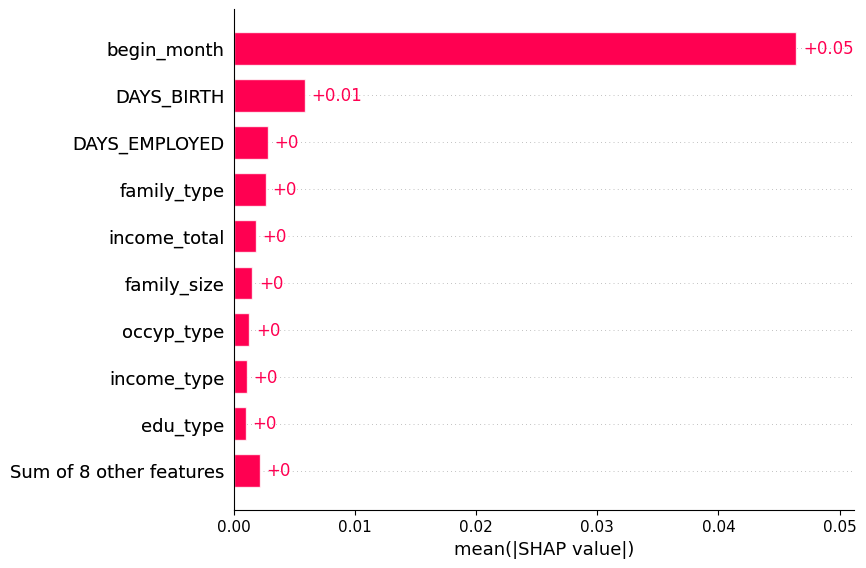

In [ ]:
#변수별 중요도 탐색
shap.plots.bar(shap_values[:,:,1])

카드를 발급받고 지난 시간이 신용도에 가장 큰 영향을 미치는 것을 확인 가능

또한 태어난 날짜에 따라 신용도에 영향을 미치는 것으로 확인 가능

이외에는 아주 큰 영향을 끼치는 변수가 적음

In [ ]:
shap_values[0]

.values =
array([[ 1.74760714e-05, -1.74760806e-05],
       [-9.24273476e-04,  9.24273681e-04],
       [-5.30255419e-04,  5.30255726e-04],
       [-6.06114107e-04,  6.06114220e-04],
       [-1.08294787e-03,  1.08294742e-03],
       [-1.01240273e-03,  1.01240246e-03],
       [ 1.26349013e-03, -1.26348944e-03],
       [-1.61994729e-03,  1.61994726e-03],
       [ 1.16467252e-03, -1.16467203e-03],
       [ 6.50594500e-03, -6.50594479e-03],
       [ 1.30126504e-03, -1.30126510e-03],
       [-5.37633520e-05,  5.37632933e-05],
       [ 1.07605456e-04, -1.07605538e-04],
       [ 1.07791457e-04, -1.07791476e-04],
       [ 9.98607830e-04, -9.98607942e-04],
       [-9.94222406e-04,  9.94222040e-04],
       [-2.71728956e-02,  2.71728958e-02]])

.base_values =
array([0.36190145, 0.63809855])

.data =
array([ 1.0000e+00,  1.0000e+00,  0.0000e+00,  2.0000e+00,  2.2500e+05,
        3.0000e+00,  1.0000e+00,  1.0000e+00,  5.0000e+00, -1.0937e+04,
       -1.5390e+03,  0.0000e+00,  0.0000e+00,  0.0000e+00

target:  0


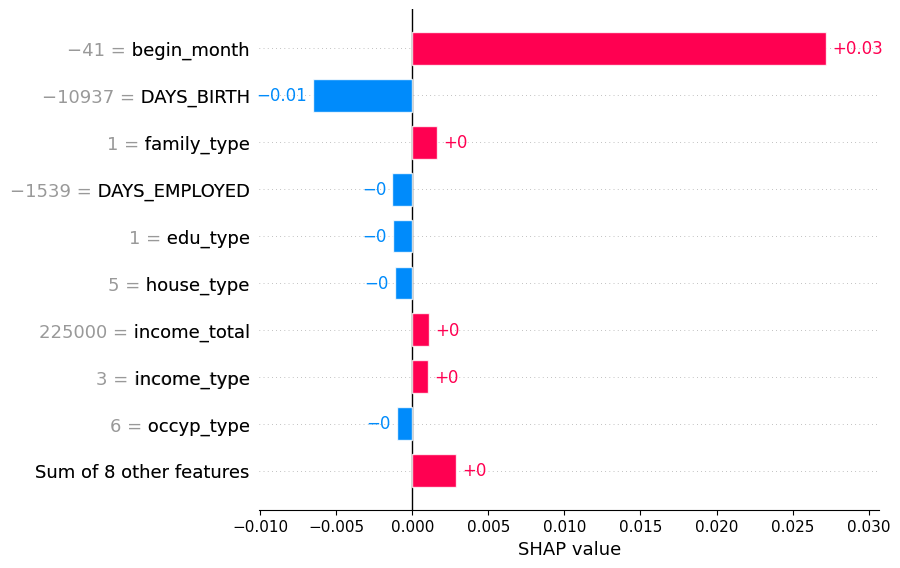

In [ ]:
#하나의 값을 뽑아서 변수가 target에 영향을 어떻게 미치는지 확인
shap.plots.bar(shap_values[:,:,1][0])

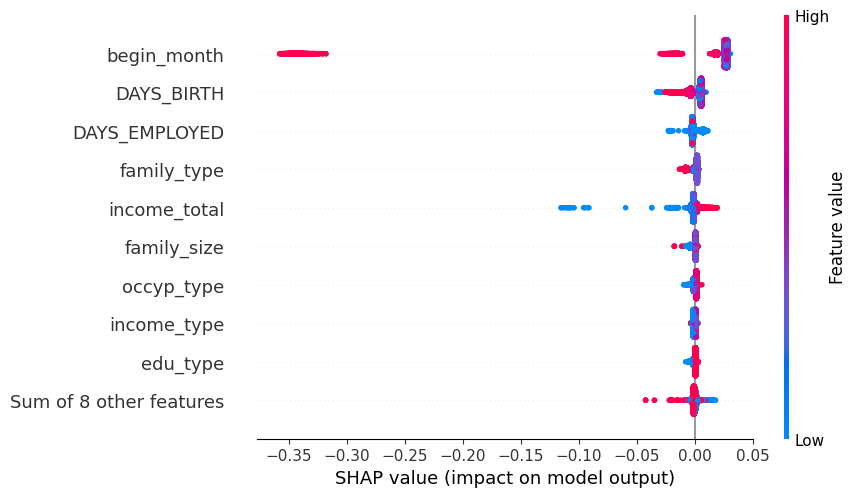

In [ ]:
#각 변수들이 target에 어떤 영향을 주는지 종합적으로 분석
shap.plots.beeswarm(shap_values[:,:,1])

target 0 : 신용도가 높음을 의미
target 1 : 신용도가 낮음(2)를 의미

발급 날짜가 높다: 발급 날짜가 최근임을 의미함

최근에 발급한 사람은 신용도가 높은 사람일 수 있다고 추측이 가능함

생일이 낮다: 태어난 날짜가 오래 되었음을 의미함

나이가 많을 수록 신용도가 높을 수 있다고 추측이 가능함

In [ ]:
#어느정도의 연체자들에게 집중하여 상품을 권하면 좋을지 Threshold를 결정
import numpy as np

bins = np.arange(0, 1.1, 0.1)
lift_base = y_train.value_counts(normalize = True)[1]

confusion_matrix1 = pd.crosstab(pd.cut(y_pred_train_proba, bins, right = False), y_train, rownames = ['predicted'], colnames = ['Actual'], margins = True)

confusion_matrix1['ratio'] = round((pd.DataFrame(confusion_matrix1)[1] / pd.DataFrame(confusion_matrix1)['All']), 2)
confusion_matrix1['Lift'] = round(confusion_matrix1['ratio'] / lift_base, 1)
confusion_matrix1

Actual,0,1,All,ratio,Lift
predicted,,,,,
"[0.0, 0.1)",1177,0,1177,0.00,0.0
"[0.1, 0.2)",10,0,10,0.00,0.0
"[0.2, 0.3)",105,2,107,0.02,0.0
"[0.3, 0.4)",271,12,283,0.04,0.1
"[0.4, 0.5)",547,86,633,0.14,0.2
"[0.5, 0.6)",1180,490,1670,0.29,0.5
"[0.6, 0.7)",2170,3140,5310,0.59,0.9
"[0.7, 0.8)",1165,7047,8212,0.86,1.3
"[0.8, 0.9)",17,1075,1092,0.98,1.5


#Summary

y_pred_train_proba를 구간별로 나누어 연체자들의 분포를 살펴보고,

어느정도의 연체자들에게 상품을 집중 권유할지 분석

그래프에서 0.5 ~ 0.9 구간에서 연체자(target:1)가 가장 많이분포한다는 것을 확인가능

앞으로 예측한 y_pred_train_proba의 구간을 나누어 0.5 ~ 0.9로 예측되는 신용카드 사용자는 미리 집중적으로 관리하여 연체를 경고하고, 또한 추가적인 상품 영업을 시도하는 것이 현급 유동성과 영업이익에 좋은 영향을 줄 것으로 예상